In [2]:
!pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [34]:
# initialising lists to hold all neccesary information fromn the df file

elements = {}
number_of_charts = 0
currently_going_through_storage = False


# gothrough the whole file, extracting each OST and its fill level
with open("df.txt") as file:
    for i, line in enumerate(file):
        # when we encounter a new header, it is turned into a new diagram, for which we need to create new lists
        if(line.startswith("UUID ")):
            currently_going_through_storage = True
            elements["OSTs_" + str(number_of_charts)] = []
            elements["Use_" + str(number_of_charts)] = []
            elements["Colors_" + str(number_of_charts)] = []
        
        # when reaching the summary of a group of strorages, we move on to the next group
        elif "summary" in line:
            number_of_charts += 1
            
        # skip empty lines 
        elif len(line.split()) == 0:
            continue
        
        # safe the OST name and its corresponding fill status
        else:
            components = line.split()
            elements["OSTs_" + str(number_of_charts)].append(components[0])
            elements["Use_" + str(number_of_charts)].append(int(components[4][:-1]))
            if "MDT" in components[0]:
                elements["Colors_" + str(number_of_charts)].append("indigo")
            else:
                elements["Colors_" + str(number_of_charts)].append("cornflowerblue")

            
        


In [35]:
elements["Use_2"]

[2,
 3,
 6,
 3,
 1,
 1,
 1,
 1,
 51,
 51,
 51,
 50,
 51,
 51,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 52,
 51,
 50,
 51,
 50,
 51,
 51,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 51,
 51,
 50,
 52,
 50,
 50,
 50,
 52,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 52,
 50,
 51,
 51,
 50,
 50,
 50,
 50,
 51,
 50,
 51,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 53,
 52,
 50,
 51,
 50,
 51,
 50,
 50,
 50,
 51,
 50,
 51,
 51,
 50,
 50,
 52,
 51,
 52,
 50,
 52,
 51,
 51,
 52,
 50,
 51,
 51,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 50,
 50,
 50,
 52,
 51,
 50,
 50,
 51,
 52,
 51,
 51,
 49,
 52,
 52,
 50,
 51,
 51,
 50,
 50,
 51,
 50,
 51,
 52,
 50,
 50,
 50,
 51,
 51,
 45,
 45,
 44,
 45,
 46,
 45,
 45,
 45,
 44,
 44,
 44,
 44]

38
38
53
53
53
38
8


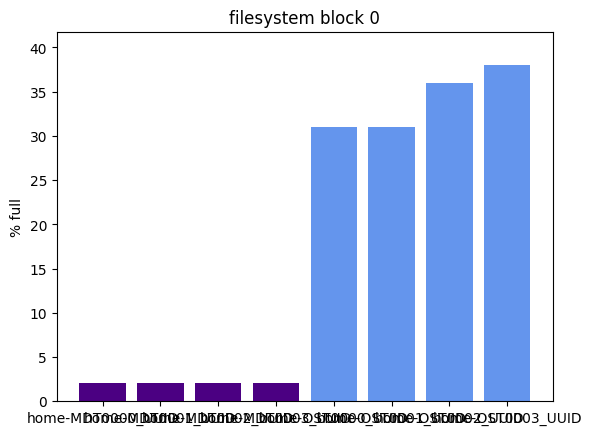

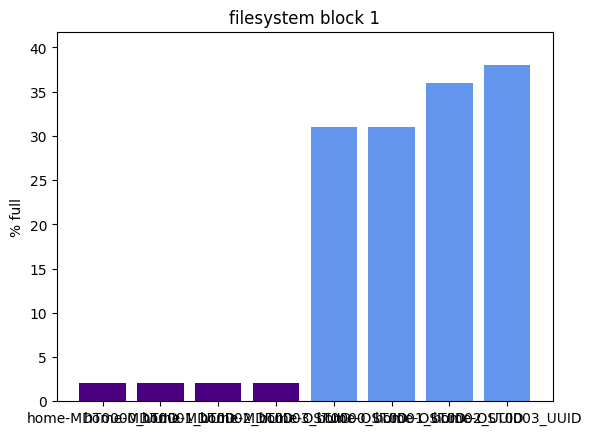

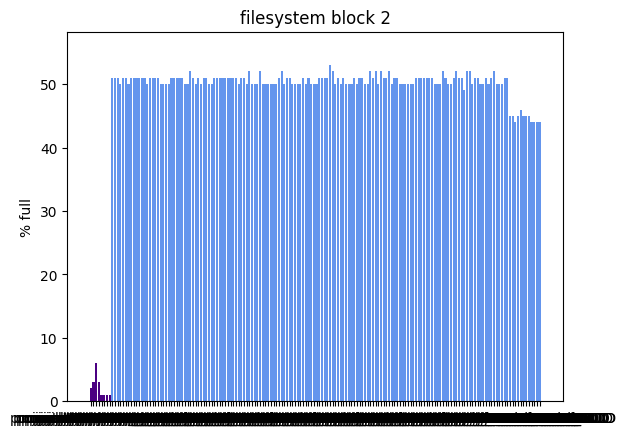

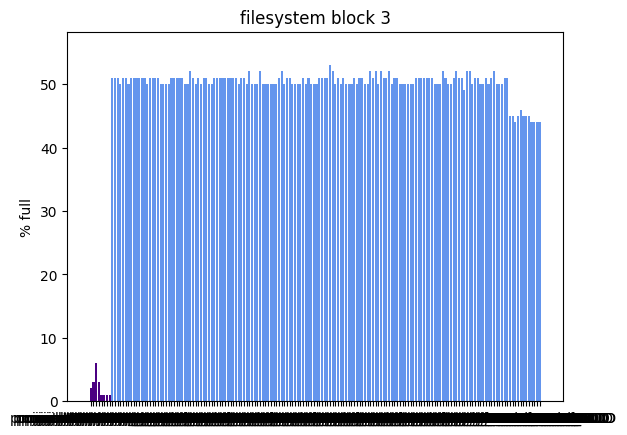

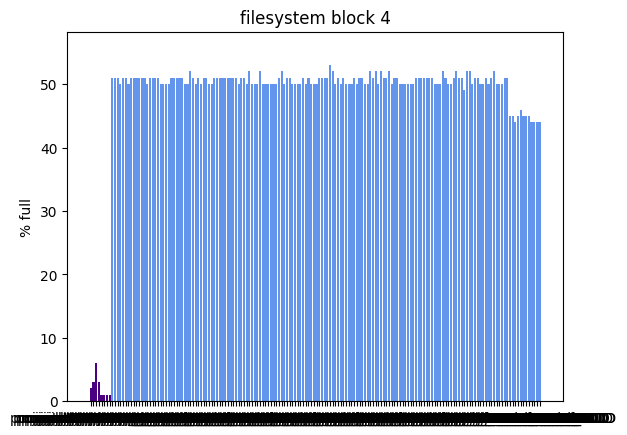

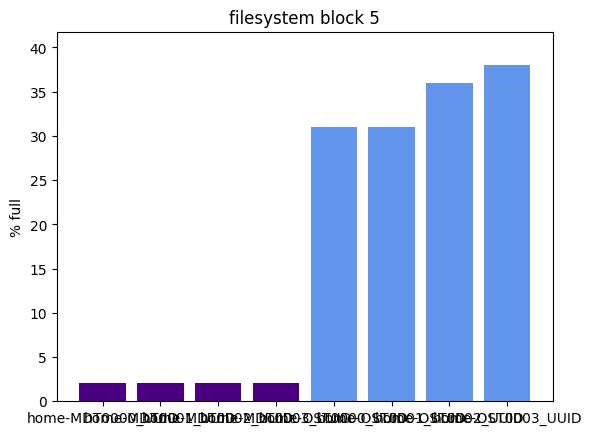

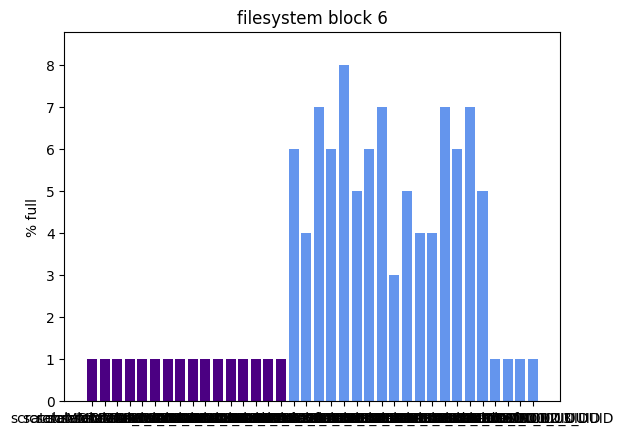

In [39]:
i = 0
while i < number_of_charts:
    fig, ax = plt.subplots()
    ax.bar(elements["OSTs_" + str(i)], elements["Use_" + str(i)], color = elements["Colors_" + str(i)])
    print(max(elements["Use_" + str(i)]))
    ax.set_ylim( [0,max(elements["Use_" + str(i)])*1.1 ])
    ax.set_ylabel("% full")
    ax.set_title("filesystem block " + str(i))
    i +=1

# To-DO
automatic plot size increase to make large diagrams more readable

readable OST-Names, if possible hover/click-able for further information

color code bars according to their realtive workload, be they too full or too empty